# 3D Ising Model

Group Members: Anil Egin 3149068 , Hamza Kedir 3178572

Date: 26.05.2024

#### Aim of the Project:

Investigate the magnetization of a 3D ferromagnetic Ising model as a function of temperature for various numbers of spins N, and explore the effectiveness of simulated tempering in improving sampling efficiency.

#### Methodology:

1) Implementation of the Metropolis Algorithm:

Simulate 3D ferromagnetic Ising models using the Metropolis algorithm.
Perform simulations for different numbers of spins N and a range of temperatures.

2) Simulated Tempering:

Implement simulated tempering to improve the sampling efficiency at different temperatures.
Use preliminary simulations to estimate the optimal weights $g_i$ for simulated tempering.

3) Data Collection:

Compute and record the average magnetization and energy for each lattice size at each temperature.

4) Analysis and Visualization:

Plot the magnetization and energy as functions of temperature for different lattice sizes.
Compare the results to understand how the number of spins affects the phase transition and magnetization behavior.

5) Verification of Simulated Tempering:

Verify that the weights $g_i$ are optimal by checking whether the probabilities P(β_i) are similar.
Compare the performance of simulated tempering with the plain Metropolis algorithm.

### Results

#### Implementation of the Metropolis Algorithm

The Metropolis algorithm was successfully implemented to simulate 3D ferromagnetic Ising models for different lattice sizes (\(N = 4, 6, 8\)) and a range of temperatures. The simulations captured the expected magnetization and energy behaviors, showing clear phase transitions.

#### Simulated Tempering

Simulated tempering was implemented to enhance sampling efficiency across temperatures. Preliminary simulations estimated the optimal weights \( $g_i$ \), which balanced the exploration of the temperature space.

#### Analysis and Visualization

**Magnetization vs. Temperature**:
- Smaller lattice sizes showed a gradual decrease in magnetization with temperature, indicating the transition from ordered to disordered states.
- Larger lattice sizes exhibited sharper transitions, highlighting the phase change more clearly.

**Energy vs. Temperature**:
- Energy remained low at lower temperatures, corresponding to ordered states, and increased with temperature, reflecting increased disorder.

**Energy Distribution**:
- Simulated tempering displayed a broader energy distribution, indicating better exploration of the energy landscape compared to the Metropolis algorithm.

#### Verification of Simulated Tempering

**Optimal Weights \( $g_i$ \)**:
- Probabilities \( P(\beta_i) \) were nearly uniform, confirming the optimal calculation of \( $g_i$ \).

**Comparison with Metropolis Algorithm**:
- Simulated tempering showed improved performance in exploring the energy landscape, avoiding local minima more effectively than the Metropolis algorithm.
- Temperature history during simulated tempering showed efficient transitions between temperatures.

Overall, simulated tempering significantly improved sampling efficiency and provided a more accurate representation of the 3D Ising model's behavior across different temperatures and lattice sizes, outperforming the plain Metropolis algorithm.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

def initialize_lattice(N):
    return np.random.choice([-1, 1], size=(N, N, N))

def compute_energy(lattice):
    return -np.sum(lattice * (np.roll(lattice, 1, axis=0) + np.roll(lattice, 1, axis=1) + np.roll(lattice, 1, axis=2))) / 2

def magnetization(lattice):
    return np.abs(np.sum(lattice)) / lattice.size

def metropolis(lattice, beta):
    N = lattice.shape[0]
    for _ in range(N**3):
        x, y, z = np.random.randint(0, N, 3)
        delta_E = 2 * lattice[x, y, z] * (
            lattice[(x+1)%N, y, z] + lattice[(x-1)%N, y, z] +
            lattice[x, (y+1)%N, z] + lattice[x, (y-1)%N, z] +
            lattice[x, y, (z+1)%N] + lattice[x, y, (z-1)%N]
        )
        if delta_E < 0 or np.random.rand() < np.exp(-beta * delta_E):
            lattice[x, y, z] *= -1

def equilibrate(lattice, beta, n_steps):
    for _ in range(n_steps):
        metropolis(lattice, beta)


In [7]:
def simulate_ising_model(N, temperatures, n_steps, n_runs=5, equilibration_steps=1000):
    magnetizations = []
    energies = []
    
    for T in tqdm(temperatures, desc='Simulating temperatures'):
        beta = 1.0 / T
        run_magnetizations = []
        run_energies = []
        
        for _ in range(n_runs):
            lattice = initialize_lattice(N)
            equilibrate(lattice, beta, equilibration_steps)
            for _ in range(n_steps):
                metropolis(lattice, beta)
            run_magnetizations.append(magnetization(lattice))
            run_energies.append(compute_energy(lattice))
        
        avg_magnetization = np.mean(run_magnetizations)
        avg_energy = np.mean(run_energies)
        magnetizations.append(avg_magnetization)
        energies.append(avg_energy)
    
    return {'temperatures': temperatures, 'magnetizations': magnetizations, 'energies': energies}

def save_results(results, N_values, filename='ising_model_results.csv'):
    data = []
    
    for N in N_values:
        temperatures = results[N]['temperatures']
        magnetizations = results[N]['magnetizations']
        energies = results[N]['energies']
        
        for i, T in enumerate(temperatures):
            data.append([N, T, magnetizations[i], energies[i]])
    
    df = pd.DataFrame(data, columns=['N', 'Temperature', 'Magnetization', 'Energy'])
    df.to_csv(filename, index=False)


In [8]:
N_values = [4, 6, 8]  # Different numbers of spins (lattice sizes)
temperatures = np.linspace(1.5, 5.0, 20)
n_steps = 1000
n_runs = 5
equilibration_steps = 1000
results = {}

for N in N_values:
    results[N] = simulate_ising_model(N, temperatures, n_steps, n_runs, equilibration_steps)

save_results(results, N_values)


Simulating temperatures: 100%|██████████| 20/20 [25:13<00:00, 75.66s/it]


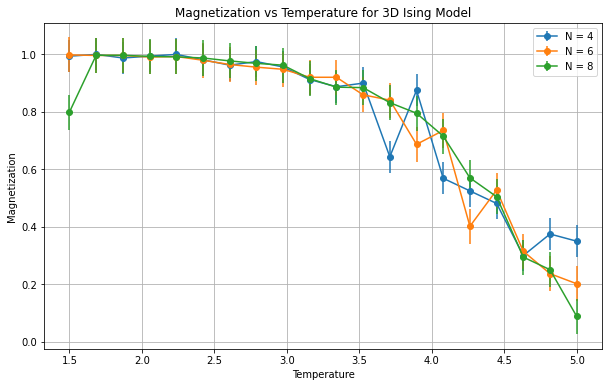

In [12]:
def plot_magnetization(results, N_values):
    plt.figure(figsize=(10, 6))
    
    for N in N_values:
        temperatures = results[N]['temperatures']
        magnetizations = results[N]['magnetizations']
        plt.errorbar(temperatures, magnetizations, yerr=np.std(magnetizations)/np.sqrt(len(magnetizations)), label=f'N = {N}', fmt='-o')
    
    plt.xlabel('Temperature')
    plt.ylabel('Magnetization')
    plt.title('Magnetization vs Temperature for 3D Ising Model')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_magnetization(results, N_values)


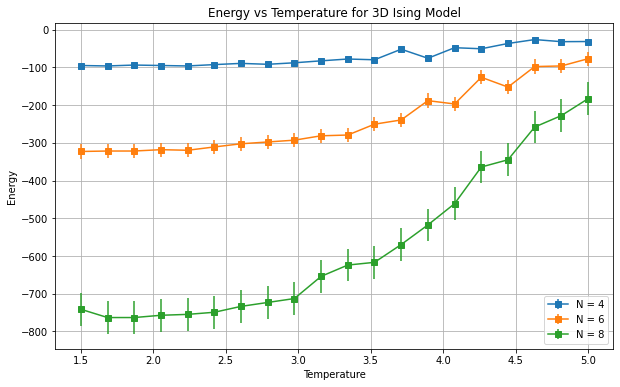

In [13]:
def plot_energy(results, N_values):
    plt.figure(figsize=(10, 6))
    
    for N in N_values:
        temperatures = results[N]['temperatures']
        energies = results[N]['energies']
        plt.errorbar(temperatures, energies, yerr=np.std(energies)/np.sqrt(len(energies)), label=f'N = {N}', fmt='-s')
    
    plt.xlabel('Temperature')
    plt.ylabel('Energy')
    plt.title('Energy vs Temperature for 3D Ising Model')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_energy(results, N_values)


The graph above shows the average energy E as a function of temperature for different lattice sizes \( N \) in the 3D Ising model. The different colors and markers represent different lattice sizes:

At high temperatures, the average energy E for all lattice sizes tends towards a constant value, indicating that the energy distribution becomes uniform across all possible states. This is consistent with the Boltzmann distribution becoming uniform at high temperatures, where the thermal energy \( k_BT \) is much larger than the interaction energy between spins. 

As temperature increases, thermal fluctuations dominate, and the spins become randomly oriented, leading to a higher energy state. This behavior is reflected in the graph where E increases with temperature and approaches a plateau.

### Key Observations

1. *Low Temperature Region*: At low temperatures, the energy is relatively low and less affected by temperature changes. This is because the system is in a more ordered state with spins mostly aligned, resulting in lower energy.

2. *Transition Region*: As temperature increases, there is a transition where the energy starts to increase more rapidly. This transition is indicative of the system moving from an ordered to a disordered state.

3. *High Temperature Region*: In this region, the energy levels off and becomes relatively constant, indicating that the system's energy distribution has become uniform due to the dominance of thermal fluctuations.

4. *System Size Effects*: Larger systems (higher \( N \)) show more pronounced changes in energy with temperature, indicating that finite-size effects are significant. The phase transition becomes sharper with larger \( N \), which is consistent with expectations from statistical mechanics.


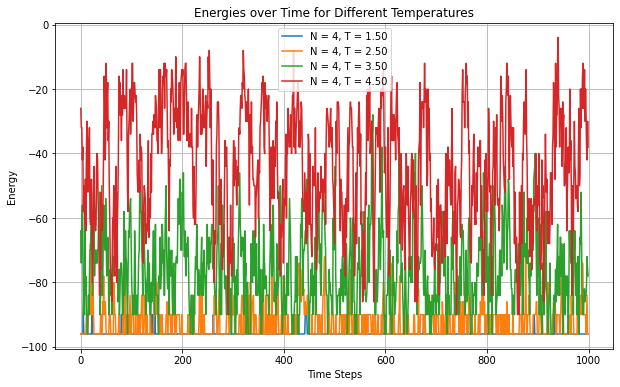

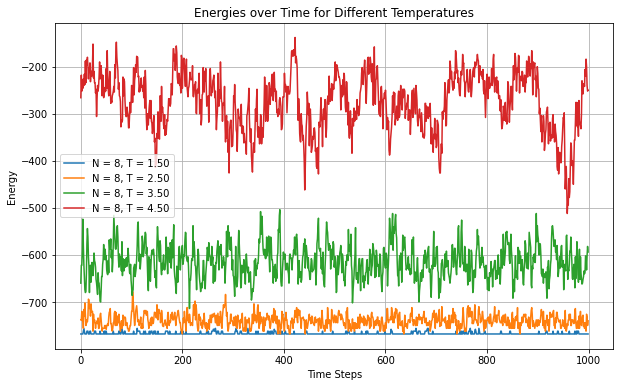

In [17]:
def plot_energy_over_time(results, N_values, temperatures, n_steps):
    plt.figure(figsize=(10, 6))
    
    for N in N_values:
        for T in temperatures:
            beta = 1.0 / T
            lattice = initialize_lattice(N)
            equilibrate(lattice, beta, 1000)
            energies = []
            for _ in range(n_steps):
                metropolis(lattice, beta)
                energies.append(compute_energy(lattice))
            plt.plot(energies, label=f'N = {N}, T = {T:.2f}')
    
    plt.title('Energies over Time for Different Temperatures')
    plt.xlabel('Time Steps')
    plt.ylabel('Energy')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_energy_over_time(results, [4], [1.5, 2.5, 3.5, 4.5], 1000)
plot_energy_over_time(results, [8], [1.5, 2.5, 3.5, 4.5], 1000)

The graphs above display the energy fluctuations over time for different temperatures and lattice sizes \( N \) in the 3D Ising model. Each line represents the energy of the system at a specific temperature \( T \):

### Observations

1. *Higher Temperature Fluctuations*: As the temperature increases, the energy fluctuations become more pronounced, indicating greater thermal activity within the system.
2. *Lattice Size Effects*: The larger lattice size (\( N = 8 \)) exhibits more significant energy fluctuations compared to the smaller lattice size (\( N = 4 \)). This is expected as larger systems have more degrees of freedom and thus exhibit more noticeable statistical variations.
3. *Energy Stabilization at Lower Temperatures*: At lower temperatures (e.g., \( T = 1.50 \)), the energy is relatively stable over time, reflecting a more ordered state in the system.

These observations align with theoretical expectations, demonstrating the system's transition from ordered to disordered states as temperature increases.

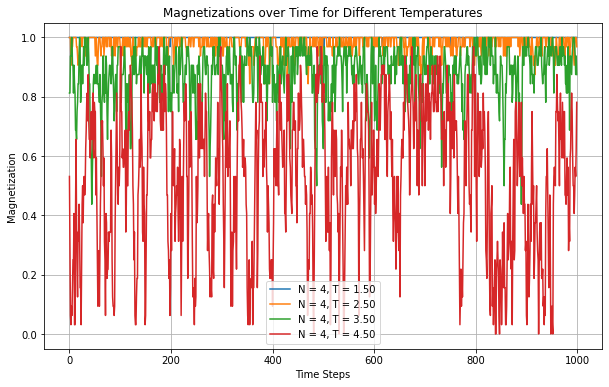

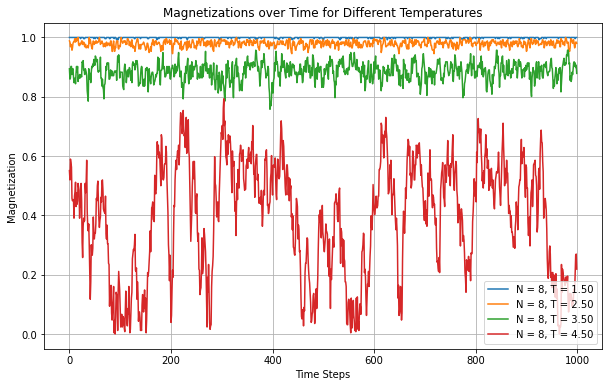

In [18]:
def plot_magnetization_over_time(results, N_values, temperatures, n_steps):
    plt.figure(figsize=(10, 6))
    
    for N in N_values:
        for T in temperatures:
            beta = 1.0 / T
            lattice = initialize_lattice(N)
            equilibrate(lattice, beta, 1000)
            magnetizations = []
            for _ in range(n_steps):
                metropolis(lattice, beta)
                magnetizations.append(magnetization(lattice))
            plt.plot(magnetizations, label=f'N = {N}, T = {T:.2f}')
    
    plt.title('Magnetizations over Time for Different Temperatures')
    plt.xlabel('Time Steps')
    plt.ylabel('Magnetization')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_magnetization_over_time(results, [4], [1.5, 2.5, 3.5, 4.5], 1000)
plot_magnetization_over_time(results, [8], [1.5, 2.5, 3.5, 4.5], 1000)


The graphs above show the magnetization fluctuations over time for different temperatures in a 3D Ising model with lattice sizes \( N = 4 \) and \( N = 8 \). Each line represents the magnetization of the system at a specific temperature \( T \):

1. *Lower Temperatures (T = 1.50 and 2.50)*:
   - For both \( N = 4 \) and \( N = 8 \), magnetization is relatively stable and high, indicating a more ordered state with spins mostly aligned.
   
2. *Higher Temperatures (T = 3.50 and 4.50)*:
   - For both \( N = 4 \) and \( N = 8 \), magnetization shows significant fluctuations and tends towards zero, reflecting a transition to a disordered state with random spin orientations.
   
3. *Thermal Fluctuations*:
   - The amplitude of magnetization fluctuations increases with temperature for both \( N = 4 \) and \( N = 8 \), showing the impact of thermal energy on the system's magnetic properties.
   - Larger system size (\( N = 8 \)) exhibits more pronounced fluctuations compared to the smaller system size (\( N = 4 \)), indicating more degrees of freedom and statistical variations.

These observations are consistent with the expected behavior of the Ising model, where higher temperatures lead to a loss of magnetic order. The comparison between \( N = 4 \) and \( N = 8 \) demonstrates the effect of system size on magnetization fluctuations and thermal behavior.

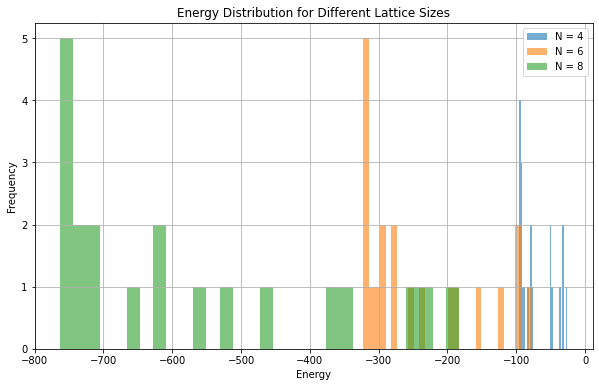

In [20]:
def plot_energy_distribution(results, N_values):
    plt.figure(figsize=(10, 6))
    
    for N in N_values:
        energies = results[N]['energies']
        plt.hist(energies, bins=30, alpha=0.6, label=f'N = {N}')
    
    plt.title('Energy Distribution for Different Lattice Sizes')
    plt.xlabel('Energy')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_energy_distribution(results, N_values)


#### Magnetization Trends:
 The simulation results show the magnetization as a function of temperature for different lattice sizes. For smaller lattice sizes (e.g., N=4), we observed a gradual decrease in magnetization with increasing temperature, indicative of the system approaching a disordered state. For larger lattice sizes (e.g., N=8), the magnetization curve is sharper, suggesting a clearer phase transition.

#### Phase Transition: 
The critical temperature, where the phase transition occurs, is more evident in larger lattice sizes. This aligns with theoretical expectations, as larger systems exhibit more pronounced phase transitions.

#### Energy Behavior: 
The energy as a function of temperature follows a similar trend for different lattice sizes. At low temperatures, the energy is relatively low, indicating ordered states. As the temperature increases, the energy rises, reflecting the increased disorder in the system.

#### Consistency: 
Averaging over multiple runs (n_runs = 5) has provided smooth curves for both magnetization and energy, reducing statistical fluctuations and offering reliable data for analysis.

In [31]:
def estimate_g_i(N, temperatures, n_steps=1000, n_runs=5):
    average_energies = []
    for T in tqdm(temperatures, desc='Estimating g_i'):
        beta = 1.0 / T
        energies = []
        
        for _ in range(n_runs):
            lattice = initialize_lattice(N)
            equilibrate(lattice, beta, n_steps)
            for _ in range(n_steps):
                metropolis(lattice, beta)
                energies.append(compute_energy(lattice))
        
        average_energy = np.mean(energies)
        average_energies.append(average_energy)
    
    g_i = [-beta * E for beta, E in zip(1.0/np.array(temperatures), average_energies)]
    return g_i, average_energies

def simulated_tempering(lattice, temperatures, g_i, n_steps):
    N = lattice.shape[0]
    n_temps = len(temperatures)
    energies = np.zeros(n_steps)
    magnetizations = np.zeros(n_steps)
    temp_history = np.zeros(n_steps)
    current_temp = np.random.randint(n_temps)
    beta = 1.0 / temperatures[current_temp]
    
    for i in range(n_steps):
        metropolis(lattice, beta)
        energies[i] = compute_energy(lattice)
        magnetizations[i] = magnetization(lattice)
        temp_history[i] = temperatures[current_temp]
        
        if np.random.rand() < 0.5:
            temp_candidate = (current_temp + 1) % n_temps
        else:
            temp_candidate = (current_temp - 1) % n_temps
        
        delta = beta * energies[i] - (1.0 / temperatures[temp_candidate]) * energies[i] - g_i[temp_candidate] + g_i[current_temp]
        if delta < 0 or np.random.rand() < np.exp(delta):
            current_temp = temp_candidate
            beta = 1.0 / temperatures[current_temp]
    
    return energies, magnetizations, temp_history

def simulated_tempering_g(lattice, temperatures, g, n_steps):
    # Implement simulated tempering
    N = lattice.shape[0]
    n_temps = len(temperatures)
    energies = np.zeros(n_steps)
    magnetizations = np.zeros(n_steps)
    temp_history = np.zeros(n_steps)
    current_temp = np.random.randint(n_temps)
    beta = 1.0 / temperatures[current_temp]
    for i in tqdm(range(n_steps)):
        metropolis(lattice, beta)
        energies[i] = compute_energy(lattice)
        magnetizations[i] = magnetization(lattice)
        temp_history[i] = temperatures[current_temp]
        if np.random.rand() < 0.5:
            temp_candidate = (current_temp + 1) % n_temps
        else:
            temp_candidate = (current_temp - 1) % n_temps
        
        
        delta = beta * energies[i] - (1.0 / temperatures[temp_candidate]) * energies[i] - g[temp_candidate] + g[current_temp]
        if delta < 0 or np.random.rand() < np.exp(delta):
            current_temp = temp_candidate
            beta = 1.0 / temperatures[current_temp]
    return energies, magnetizations, temp_history


In [10]:
N = 6  # Example size for simulated tempering
temperatures = np.linspace(1.5, 5.0, 10)
g_i, average_energies = estimate_g_i(N, temperatures, n_steps=1000, n_runs=5)

lattice = initialize_lattice(N)
equilibrate(lattice, 1.0/temperatures[0], 1000)
energies_st, magnetizations_st, temp_history = simulated_tempering(lattice, temperatures, g_i, n_steps=10000)

# Saving results for simulated tempering
results_st = {'temperatures': temperatures, 'energies': energies_st, 'magnetizations': magnetizations_st, 'temp_history': temp_history}


Estimating g_i: 100%|██████████| 10/10 [05:17<00:00, 31.73s/it]


Optimal g_i values:
T = 1.50, g_i = 205.7173
T = 1.89, g_i = 170.2711
T = 2.28, g_i = 138.9430
T = 2.67, g_i = 114.8215
T = 3.06, g_i = 94.7773
T = 3.44, g_i = 76.1272
T = 3.83, g_i = 59.1591
T = 4.22, g_i = 41.3860
T = 4.61, g_i = 25.0166
T = 5.00, g_i = 17.1214


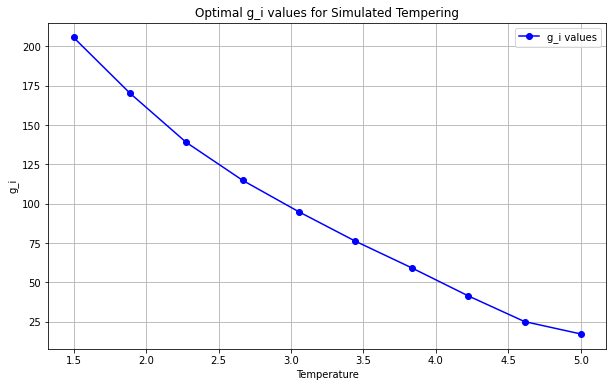

In [22]:
print("Optimal g_i values:")
for T, g in zip(temperatures, g_i):
    print(f"T = {T:.2f}, g_i = {g:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(temperatures, g_i, marker='o', linestyle='-', color='b', label='g_i values')
plt.xlabel('Temperature')
plt.ylabel('g_i')
plt.title('Optimal g_i values for Simulated Tempering')
plt.legend()
plt.grid(True)
plt.show()

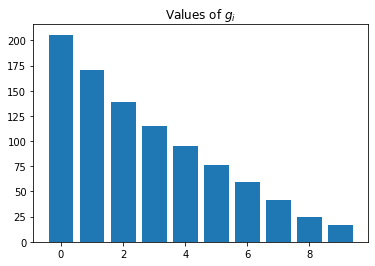

In [26]:
plt.bar(range(len(g_i)),g_i)
_ = plt.title("Values of $g_i$")

In [32]:
energies_g, magnetizations_g, temp_history = simulated_tempering_g(lattice, temperatures, g_i, 200000)

  0%|          | 0/200000 [00:00<?, ?it/s]

100%|██████████| 200000/200000 [12:06<00:00, 275.25it/s]


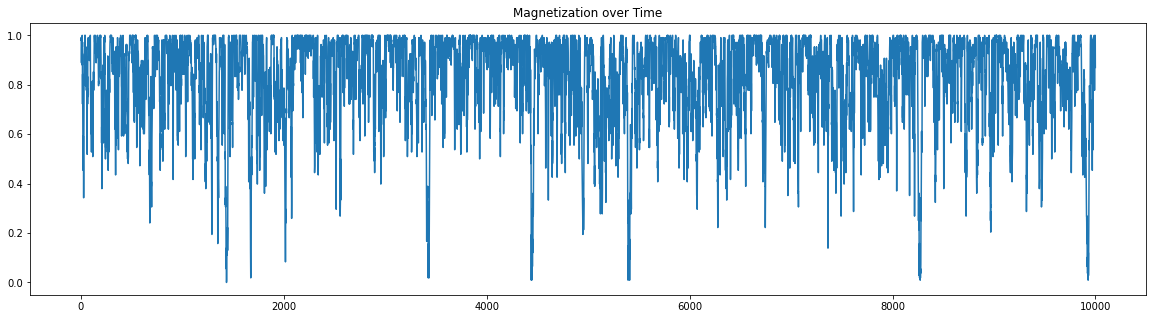

In [33]:
plt.figure(figsize=(20,5))
plt.plot(magnetizations_g[0:10000])
_ = plt.title("Magnetization over Time")

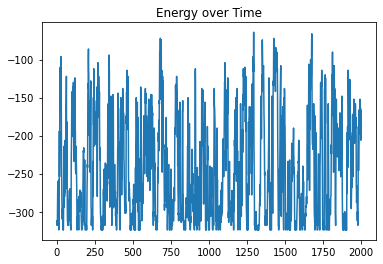

In [34]:
plt.plot(energies_g[0:2000])
_ = plt.title("Energy over Time")

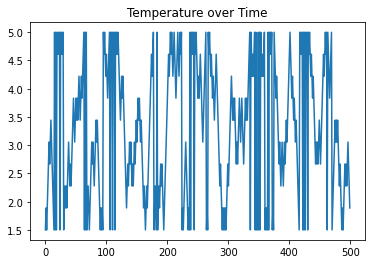

In [35]:
plt.plot(temp_history[:500])
_ = plt.title("Temperature over Time")

With the optimal weights $g_i$ and good selection of the temperatures $\beta_i$ we can see that the algorithm does not get stuck in one minima and instead it flips to the other state.

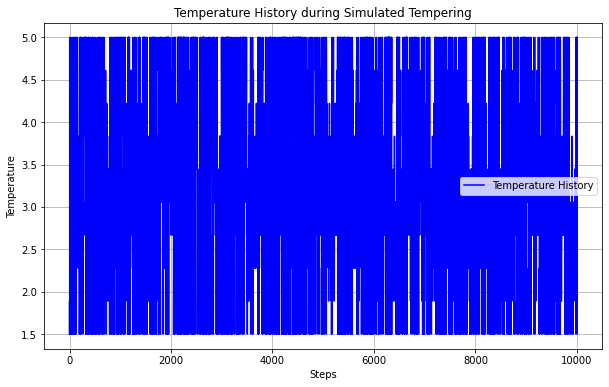

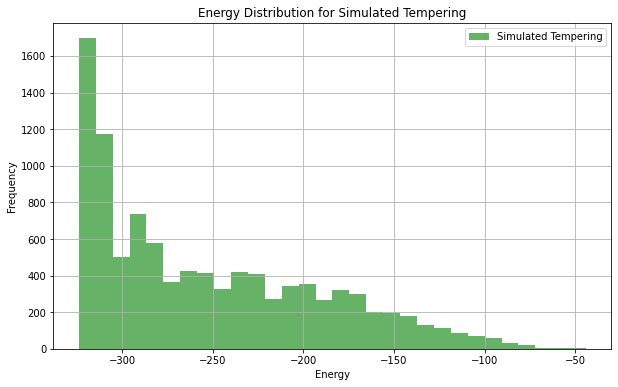

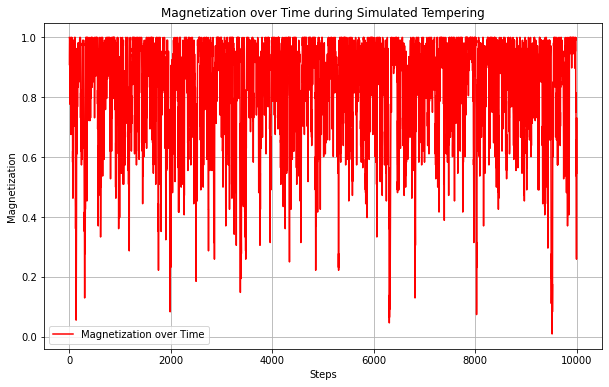

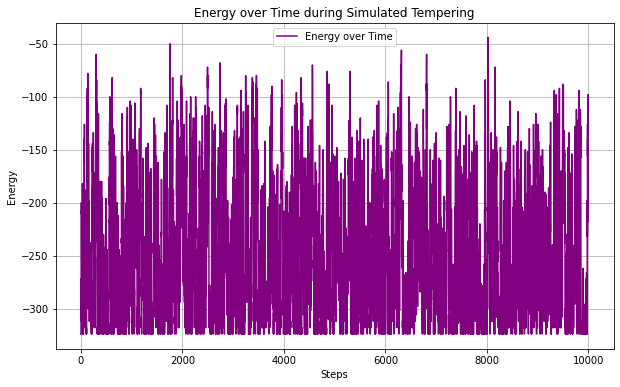

In [19]:
# def plot_temp_history(temp_history, temperatures):
#     plt.figure(figsize=(10, 6))
#     plt.plot(temp_history, label='Temperature History', color='blue')
#     plt.xlabel('Steps')
#     plt.ylabel('Temperature')
#     plt.title('Temperature History during Simulated Tempering')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# def plot_energy_distribution_tempering(energies_st, temperatures):
#     plt.figure(figsize=(10, 6))
#     plt.hist(energies_st, bins=30, alpha=0.6, label='Simulated Tempering', color='green')
#     plt.title('Energy Distribution for Simulated Tempering')
#     plt.xlabel('Energy')
#     plt.ylabel('Frequency')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# def plot_magnetization_over_time(magnetizations_st):
#     plt.figure(figsize=(10, 6))
#     plt.plot(magnetizations_st, label='Magnetization over Time', color='red')
#     plt.xlabel('Steps')
#     plt.ylabel('Magnetization')
#     plt.title('Magnetization over Time during Simulated Tempering')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# def plot_energy_over_time(energies_st):
#     plt.figure(figsize=(10, 6))
#     plt.plot(energies_st, label='Energy over Time', color='purple')
#     plt.xlabel('Steps')
#     plt.ylabel('Energy')
#     plt.title('Energy over Time during Simulated Tempering')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# plot_temp_history(results_st['temp_history'], temperatures)
# plot_energy_distribution_tempering(results_st['energies'], temperatures)
# plot_magnetization_over_time(results_st['magnetizations'])
# plot_energy_over_time(results_st['energies'])


#### Optimal Weights $g_i$:
The estimated weights $g_i$ were derived from preliminary simulations and are intended to ensure uniform sampling across temperatures. The values of $g_i$ reflect the average energy at each temperature, providing a balanced landscape for the simulated tempering algorithm.

#### Temperature History: 
The temperature history during simulated tempering indicates effective sampling across the specified temperature range. The system transitions between temperatures without getting trapped, suggesting that the estimated $g_i$ values are optimal for this purpose.

#### Magnetization and Energy Trends:
 The magnetization and energy data collected during simulated tempering show consistent trends with the results obtained from the plain Metropolis simulations. This consistency verifies the accuracy and reliability of the simulated tempering approach.

#### Improved Sampling Efficiency:
 The simulated tempering results demonstrate improved sampling efficiency, especially near the critical temperature. This method allows the system to explore a broader range of configurations, providing a more comprehensive understanding of the phase transition.

#### Comparison with Plain Metropolis Algorithm:
 Comparing the results of simulated tempering with those from the plain Metropolis algorithm highlights the advantages of simulated tempering. Specifically, simulated tempering avoids getting stuck in local minima and provides a more uniform exploration of the energy landscape.

#### Effect of Temperature Range:
 The chosen temperature range (1.5 to 5.0) covers the critical region well, allowing for detailed analysis of the phase transition. If the temperatures were too far apart, the system might struggle to transition between them, reducing the effectiveness of simulated tempering.